In [1]:
import pandas as pd

In [2]:
import seaborn as sns

In [3]:
import matplotlib.pyplot as plt

In [4]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [5]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [6]:
data = pd.read_csv("D:\Projects\Flipkart_reviews.csv")

In [7]:
data

,Unnamed: 0,Product_name,Review,Rating
0,0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
4,4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5
...,...,...,...,...
2299,2299,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,"Great display, accurate colours at this price ...",5
2300,2300,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Superb monitor first brought 1 used for 2 mont...,5
2301,2301,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Awesome,5
2302,2302,MSI 27 inch Full HD IPS Panel Monitor (PRO MP2...,Only one issue with adapter,5


In [8]:
data.head()

,Unnamed: 0,Product_name,Review,Rating
0,0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
4,4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5


In [9]:
print(data.isnull().sum())

Unnamed: 0      0
Product_name    0
Review          0
Rating          0
dtype: int64


In [10]:
import nltk

In [11]:
import re

In [12]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kjsra\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
stemmer = nltk.SnowballStemmer ("english")

In [14]:
from nltk.corpus import stopwords

In [15]:
import string

In [16]:
stopword = set(stopwords.words('english'))

In [17]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]','',text)
    text = re.sub('https?://\S+|www\.\S+', '',text)
    text = re.sub('<.*?>+', '',text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '',text)
    text = re.sub('\n', '',text)
    text = re.sub('\w*\d\w*', '',text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem (word) for word in text.split(' ')]
    text=" ".join(text)
    return text
data["Review"] = data["Review"].apply(clean)


In [18]:
ratings = data["Rating"].value_counts()
numbers = ratings.index
quantity = ratings.values
import plotly.express as px
figure = px.pie(data,values = quantity, names=numbers, hole = 0.5)
figure.show()

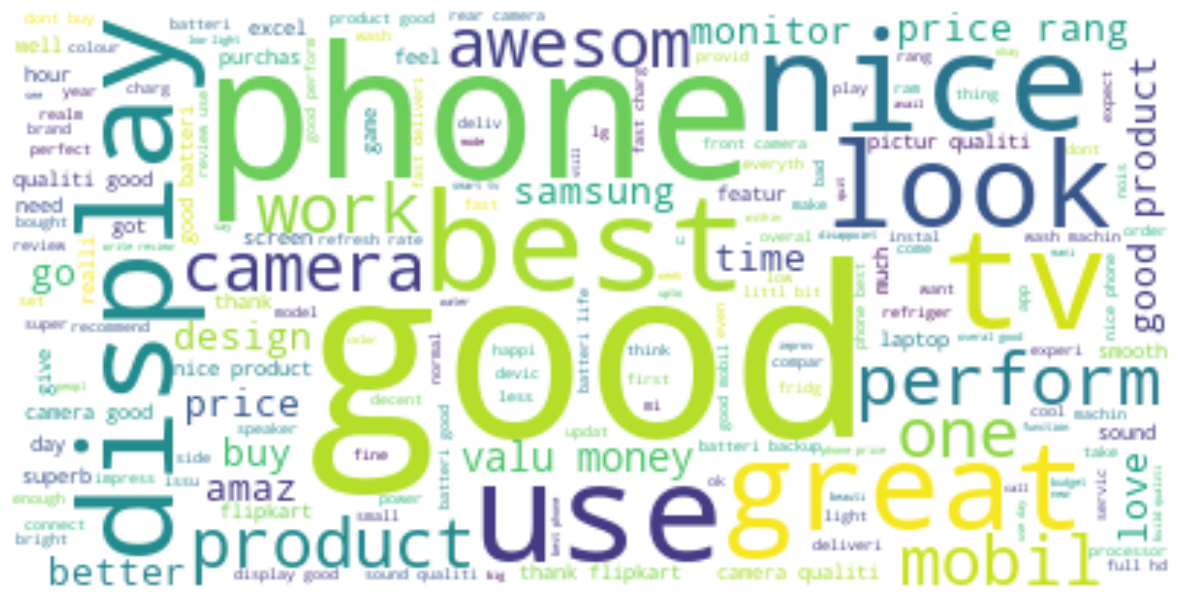

In [19]:
text = " ".join(i for i in data.Review)
stopwords = set (STOPWORDS)
wordcloud = WordCloud (stopwords=stopwords,
background_color="white").generate(text)
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [26]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd

nltk.download('vader_lexicon')

# Assuming you have a DataFrame named 'data' with a column 'Review'
sentiments = SentimentIntensityAnalyzer()

# Create new columns in the DataFrame for sentiment scores
data["Positive"] = [sentiments.polarity_scores(review)["pos"] for review in data["Review"]]
data["Negative"] = [sentiments.polarity_scores(review)["neg"] for review in data["Review"]]
data["Neutral"] = [sentiments.polarity_scores(review)["neu"] for review in data["Review"]]

# Display the updated DataFrame
print(data.head())


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\kjsra\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


   Unnamed: 0                                       Product_name  \
0           0  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
1           1  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
2           2  Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...   
3           3  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   
4           4  DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...   

                                              Review  Rating  Positive  \
0  best  great performancei got around  backup bi...       5     0.395   
1                                        good perfom       5     0.744   
2  great perform usual also game laptop issu batt...       5     0.277   
3                        wife happi best product 👌🏻😘       5     0.512   
4  light weight laptop new amaz featur batteri li...       5     0.000   

   Negative  Neutral  
0     0.101    0.504  
1     0.000    0.256  
2     0.000    0.723  
3     0.000    0.488  
4     0.000    1.000  


In [28]:
x = sum(data["Positive"])
y = sum(data["Negative"])
z = sum(data["Neutral"])
def sentiment_score(a, b, c):
    if (a>b) and (a>c):
            print("Positive ☺️ ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
sentiment_score(x, y, z)

Neutral 🙂 


In [29]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  923.5529999999985
Negative:  96.77500000000013
Neutral:  1283.6880000000006
